# Regularized Regressions 

## 1. First generate NxK draws from the standard normal.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNetCV

n = 50

x0 = np.random.normal(size = n) 
x1 = np.random.normal(size = n) 
x2 = np.random.normal(size = n) 
x3 = np.random.normal(size = n) 
x4 = np.random.normal(size = n) 
x5 = np.random.normal(size = n)

df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2,"x3":x3,"x4":x4,"x5":x5})
df.head()

,x0,x1,x2,x3,x4,x5
0,0.531539,-1.335961,0.436138,0.273986,-0.858808,-1.611341
1,-1.822084,1.899435,0.091579,-1.208160,-0.679749,0.217652
2,-0.572626,-0.992687,0.106245,-0.860136,-0.519436,-0.870806
3,1.175917,-0.189670,-0.135167,0.454112,-0.499868,-0.504661
4,-0.573204,1.219219,-0.348885,0.366103,-0.105462,-0.664914


## 2. Generate your outcome by making up a function, like $y = 0.8*x_3 - 0.02*x_8 + ... + \epsilon$.  You can vary how many predictors are in there, but 4 or 5 is fine.  Epsilon is some random noise (the larger the standard deviation of the normal noise, the more data you'll need to get good estimates).

I'm going to create the outcome variable using the following linear model:

$$y = 0.3*x_0 -0.08*x_1 + 0.1*x_2 + 0.5*x_3 - 0.84*x_4 + 0.07*x_5 + \epsilon$$
Where
$$\epsilon \sim Normal(0, 2)$$

In [21]:
df["y"] = 0.3*df["x0"]  -0.08*df["x1"] + 0.1*df["x2"] + 0.5*df["x3"]  -0.84*df["x4"] + 0.07*df["x5"] + pd.Series(np.random.normal(scale = 2, size = n))

## 3. Compare the out-of-sample performance of LASSO, Ridge, OLS, and Elastic Net, using k-fold cross validation

I used 5-fold cross-validation to evaluate the performance of all the models. This means that, in the training data, I create 5 fold of data. I train the model with 4 folds, and try to predict the values in the fourht fold of data. Each time I predict the values of the excluded fold, I compute the permormance of the model by $R^2$ that is by 

$$R^{2} = 1 - \frac{\sum_{i = 1}^{800}(y_{i} - \hat{y_{i}})^2}{\sum_{i = 1}^{800} (y_{i} - \bar{y})^{2}}$$



where $y_{i}$ is the response variable at row $i$, $\hat{y}$ is the average value of the response variable in the whole trained data, and 

 I later report the mean and standard deviation of the five performance scores. The better model is the one with the highest mean and sd.


In [22]:
X = df.drop(['y'], axis = 1)
Y = df['y']

### 3.1 LASSO

In [23]:
lasso = linear_model.LassoCV(max_iter = 6000)
lasso.fit(X, Y)
lasso_scores = lasso.score(X,Y)
lasso_scores

print(f'k-fold cross validation score is : {round(np.mean(lasso_scores), 3)} with sd: {round(np.std(lasso_scores), 3)}')

k-fold cross validation score is : 0.409 with sd: 0.0


The score here is $r^2$

### 3.2 Ridge regression

In [24]:
ridge = RidgeCV()
ridge.fit(X,Y)
ridge_scores = ridge.score(X,Y)
ridge_scores
print(f'k-fold cross validation score is : {round(np.mean(ridge_scores), 3)} with sd: {round(np.std(ridge_scores), 3)}')

k-fold cross validation score is : 0.416 with sd: 0.0


### 3.3 OLS

In [25]:
ols = LinearRegression().fit(X, Y)

ols_pred = ols.predict(X)

## 5 fold cross validation ( the default method)
ols_scores = cross_val_score(ols, X,Y)
ols_scores
print(f'5-fold cross validation score is : {round(np.mean(ols_scores), 3)} with sd: {round(np.std(ols_scores), 3)}')

5-fold cross validation score is : -0.117 with sd: 0.498


The score here is $r^2$, explained variance is very similar, but is not the same value.

### 3.4 Elastic Net

In [26]:
en = ElasticNetCV()
en.fit(X, Y)
en_pred = en.predict(X)

en_scores = en.score(X,Y)
en_scores
print(f'k-fold cross validation score is : {round(np.mean(en_scores), 3)} with sd: {round(np.std(en_scores), 3)}')


k-fold cross validation score is : 0.403 with sd: 0.0


According to the r^2 measure of performance, the model that explains the most out-of-sample variance is the lasso, and ols models. Both with $r^2 = 0.24$ and the same standard deviation. Next is the ridge model with $r^2 = 0.22$

The predictions of the OLS, and ridge are almost identical. 
the predictions

# 4. Run multiple simulations (both at testing and training) to get a handle of the uncertainty and level of noise you're encountering.  Try varying N, K, the number of folds, etc.  Be sure to do some with N very small, (maybe as little as 2x or 3x K.  Some environments like genetics have K > N!)

In [27]:
n_trials = 10

estimates = {}

for i in range(n_trials):
    
    X = df.drop(["y"], axis = 1)
    Y = df["y"]

    lasso = linear_model.Lasso(max_iter = 4000)
    #lasso.fit(X, Y)
    lasso_scores = cross_val_score(lasso, X, Y, cv = 5)
    
    ridge = RidgeCV()
    #ridge.fit(X, Y)
    ## 5 fold cross validation ( the default method)
    ridge_scores = cross_val_score(ridge, X, Y, cv = 5)

    ols = LinearRegression().fit(X, Y)
    ols_pred = ols.predict(X)
    ## 5 fold cross validation ( the default method)
    ols_scores = cross_val_score(ols, X, Y, cv = 5)

    en = ElasticNetCV()
    en.fit(X, Y)

    en_pred = en.predict(X)

    ## 5 fold cross validation ( the default method)
    en_scores = cross_val_score(en, X, Y, cv = 5)

    estimates[fold] = (est)

NameError: name 'est' is not defined

In [ ]:
start = 15
N = 500

est_lasso = []
est_ridge = []
est_ols = []
est_en = []

for size in range(start, N):
    # Create a new data set each round
    x0 = np.random.normal(size = size) 
    x1 = np.random.normal(size = size) 
    x2 = np.random.normal(size = size) 
    x3 = np.random.normal(size = size) 
    x4 = np.random.normal(size = size) 
    x5 = np.random.normal(size = size)

    df = pd.DataFrame({"x0":x0, "x1":x1, "x2":x2,"x3":x3,"x4":x4,"x5":x5})

    df["y"] = 0.3*df["x0"] -0.08*df["x1"] + 0.1*df["x2"] + 0.5*df["x3"]  -0.84*df["x4"] + 0.07*df["x5"] + pd.Series(np.random.normal( scale = 2, size = size))
    
    # get the dependent and independent variables separetly
    X = df.drop(['y'], axis =1)
    Y = df["y"]
    # Fit the regression using the most efficient number of cross validation folds and use this number of folds to get the performance score
    lasso = linear_model.LassoCV(max_iter = 6000)
    lasso.fit(X,Y)
    lasso_scores = lasso.score(X,Y)

    ridge = RidgeCV()
    ridge.fit(X, Y)
    ridge_scores = ridge.score(X,Y)

    ols = LinearRegression().fit(X, Y)

    ols_scores = cross_val_score(ols, X, Y)
    en = ElasticNetCV()
    en.fit(X, Y)

    ## 5 fold cross validation ( the default method)
    en_scores = en.score(X,Y) 

    est_lasso.append(lasso_scores)
    est_ridge.append(ridge_scores)
    est_ols.append(ols_scores)
    est_en.append(en_scores)

In [ ]:
def get_mean(estimate):
    means = np.array([*map(np.mean, estimate)])
    sds = np.array([*map(np.std, estimate)])
    lower_bound = means - sds
    upper_bound = means + sds
    return means, sds, lower_bound, upper_bound

mean_ols, sds_ols, lb_ols, up_ols =  get_mean(est_ols)

Text(0.5, 1.0, 'Lasso regression performance, as the number of data poitns increased')

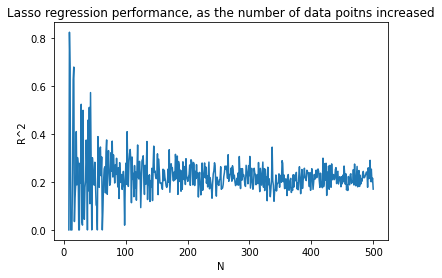

In [ ]:
x_axis = np.linspace(start, N, len(est_lasso))

sns.lineplot(x = x_axis, y = est_lasso)
#plt.fill_between(x_axis, lb_lasso, up_lasso, alpha =0.3)
plt.ylabel('R^2')
plt.xlabel('N')
plt.title('Lasso regression performance as N increases')

Text(0, 0.5, 'R^2')

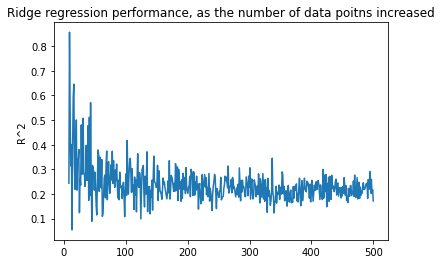

In [ ]:
sns.lineplot(x = x_axis, y = est_ridge)
plt.title('Ridge regression performance as the N increases')
plt.ylabel('R^2')

Text(0.5, 0, 'N')

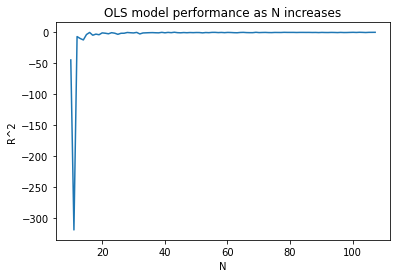

In [ ]:
sns.lineplot(x = x_axis[:100], y = mean_ols[:100])
plt.ylabel('R^2')
plt.title('OLS model performance as N increases')
plt.xlabel('N')

Text(0.5, 0, 'N')

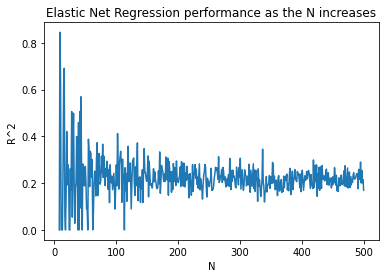

In [ ]:
sns.lineplot(x = x_axis, y = est_en)
plt.title('Elastic Net Regression performance as the N increases')
plt.ylabel('R^2')
plt.xlabel('N')

In [28]:
start = 15
N = 400

lasso_per = []
ridge_per = []
ols_per = []
en_per = []

def df_create(n,k):
    #df = pd.DataFrame()
    cols = []
    col_names = []
    for var in range(k):
        cols.append(np.random.normal(size =n))
        col_names.append(f'x{var}')
    df = pd.DataFrame.from_records(np.transpose(cols), columns=col_names)
    return df

for k in [2, 20, 200]:

    for size in range(start, N):
        df = df_create(size,k)
        df['y'] = 0
        for col in range(len(df.columns) -1):
            df['y'] += np.random.normal(scale = 5)*df[f'x{col}']
            # add the random noise 
        df['y'] += pd.Series(np.random.normal( scale = 2, size = size))
        # Create a new data set each round
     
        # get the dependent and independent variables separetly
        X = df.drop(['y'], axis =1)
        Y = df["y"]
        # Fit the regression using the most efficient number of cross validation folds and use this number of folds to get the performance score
        lasso = linear_model.LassoCV(max_iter = 6000)
        lasso.fit(X,Y)
        lasso_scores = lasso.score(X,Y)

        ridge = RidgeCV()
        ridge.fit(X, Y)
        ridge_scores = ridge.score(X,Y)

        ols = LinearRegression().fit(X, Y)

        ols_scores = cross_val_score(ols, X, Y)
        en = ElasticNetCV()
        en.fit(X, Y)

        ## 5 fold cross validation ( the default method)
        en_scores = en.score(X,Y) 

        lasso_per.append(lasso_scores)
        ridge_per.append(ridge_scores)
        ols_per.append(ols_scores)
        en_per.append(en_scores)

In [29]:
plot_k = pd.DataFrame({'performance': lasso_per + ridge_per + ols_per + en_per, 'model': ['lasso']*len(lasso_per) + ['ridge']*len(ridge_per) + ['ols']*len(ols_per) + ['EN']*len(en_per),
'k': [2]*385 + [20]*385 + [200]*385 +[2]*385 + [20]*385 + [200]*385+[2]*385 + [20]*385 + [200]*385+[2]*385 + [20]*385 + [200]*385})
plot_k['N'] = pd.Series()
plot_k.head()

,performance,model,k
0,0.543208,lasso,2
1,0.656426,lasso,2
2,0.924417,lasso,2
3,0.74305,lasso,2
4,0.769665,lasso,2


Text(0.5, 0, 'N')

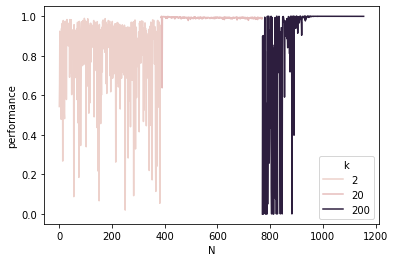

In [34]:
sns.lineplot(data = plot_k[:385*3], x =np.linspace(0, 385*3, 385*3), y = 'performance', hue = 'k')
plt.xlabel('N')


In [ ]:
plt.plot(np.linspace(0, 385, len(plot_k)), plot_k.performance)

In [ ]:
def df_create(n,k):
    df = pd.DataFrame()
    for var in range(k):
        df[f'x{var}'] = np.random.normal(size =n)

    return df 

#df_created = df_create(200, 5)


#df_created['y'] = 0
#for col in range(len(df_created.columns) -1):
#    df_created['y'] += np.random.normal(scale = 5)*df_created[f'x{col}']

# df_created.head()

#np.random.normal(1)*df_created[['x1']]


In [ ]:
k = 3
n = 50
cols = []
col_names = []
for var in range(k):
    cols.append(np.random.normal(size =n))
    col_names.append(f'x{var}')

#print(cols, col_names)
pd.DataFrame(np.transpose(cols), columns = col_names)

Do some extensions.  Some possible ideas:

   - Make some of the features correlated (generate some of the columns just like you generated the outcome: as a function of 1 or more other features + some random noise).  Does high correlation (less random noise) lead to problems in estimation or prediction?

   - Make some features binary.  Does having it unbalanced change the results much?

   - Add in quadratic and interaction effects.  This would require an additional K^2 predictors(!), so LASSO is probably the way to go.  Unless theoretically motivated, it's usually a good assumption that an interaction effect is only detectable if the individual effects are (i.e., don't bother looking for beta_3*x_1*x_2 if beta_2*x_2 and beta_1*x_1 both come up empty-handed ahead of time).  See how well doing LASSO works with all features and interactions, and then compare it to using LASSO with the just the K predictors to find the best predicting features, and then only create the interactions for those relevant ones.

    - Have outliers by having the outcome or some columns draw from a t-distribution.  You can tune how many/large the outliers are by changing the degrees of freedom on the t-distribution

    - Feel free to explore any other questions or ideas you want to investigate.

what happens when there is heteroskedasticity ?
 -> is unafected

In [1]:
start = 15
N = 500
k = 10 

est_lasso = []
est_ridge = []
est_ols = []
est_en = []

for size in range(start, N):
    # Create a new data set each round
    df = df_create(size,k)
    df['y'] = 0
    for col in range(len(df.columns) -1):
        df['y'] += np.random.normal(scale = 5)*df[f'x{col}']
    df['y'] += pd.Series(np.random.normal( scale = 2, size = size))
    #Create a correlated variable
    df['x10'] = df['x0'] + 3*df['x4']
    
    # get the dependent and independent variables separetly
    X = df.drop(['y'], axis =1)
    Y = df["y"]
    # Fit the regression using the most efficient number of cross validation folds and use this number of folds to get the performance score
    lasso = linear_model.LassoCV(max_iter = 6000)
    lasso.fit(X,Y)
    lasso_scores = lasso.score(X,Y)

    ridge = RidgeCV()
    ridge.fit(X, Y)
    ridge_scores = ridge.score(X,Y)

    ols = LinearRegression().fit(X, Y)

    ols_scores = cross_val_score(ols, X, Y)
    en = ElasticNetCV()
    en.fit(X, Y)

    ## 5 fold cross validation ( the default method)
    en_scores = en.score(X,Y) 

    est_lasso.append(lasso_scores)
    est_ridge.append(ridge_scores)
    est_ols.append(ols_scores)
    est_en.append(en_scores)

NameError: name 'df_create' is not defined